In [ ]:
import cv2
import numpy as np
import random

def add_noise(image):
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def adjust_contrast(image, factor=0.5):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

def create_gradient_fade(image):
    h, w, _ = image.shape
    fade_mask = np.zeros((h, w), np.float32)

    # Create a horizontal gradient mask
    for i in range(w):
        fade_mask[:, i] = (1 - (i / w))  # Fades from left (1) to right (0)

    # Apply the fade mask to the image
    faded_image = image * fade_mask[:, :, np.newaxis]
    return np.clip(faded_image, 0, 255).astype(np.uint8)

def random_fade(image):
    h, w, _ = image.shape
    faded_image = image.copy()

    # Choose random rectangles for fading
    num_fades = random.randint(1, 5)
    for _ in range(num_fades):
        x_start = random.randint(0, w - 20)
        y_start = random.randint(0, h - 20)
        width = random.randint(15, 60)
        height = random.randint(15, 60)

        # Create a patch and apply fading
        for y in range(y_start, y_start + height):
            for x in range(x_start, x_start + width):
                if 0 <= x < w and 0 <= y < h:
                    fade_value = random.uniform(0.5, 0.9)  # Random fade factor
                    faded_image[y, x] = faded_image[y, x] * fade_value

    return np.clip(faded_image, 0, 255).astype(np.uint8)

# Example of using these functions
# image = cv2.imread('ancient_statue.png')
# gradient_faded_image = create_gradient_fade(image)
# random_faded_image = random_fade(image)


# Example of using these functions
# image = cv2.imread('ancient_statue.png')
# noisy_image = add_noise(image)
# contrast_image = adjust_contrast(image)
# removed_part_image = random_fade(image)


# Blend water stains into the image
# water_damaged_image = cv2.bitwise_and(image, image, mask=water_mask)


In [ ]:
import cv2
import numpy as np
import random

def random_shape_removal(image):
    height, width = image.shape[:2]

    # Create a blank mask
    mask = np.ones((height, width), dtype=np.uint8)  # Start with a mask of ones

    # Randomly choose the shape and parameters
    shape_type = random.choice(['circle', 'rectangle'])

    # Limit the size of the removed part
    max_radius = 15  # Maximum radius for circle
    max_width = 30   # Maximum width for rectangle
    max_height = 30  # Maximum height for rectangle

    if shape_type == 'circle':
        # Random center and small radius for the circle
        center_x = random.randint(max_radius, width - max_radius)
        center_y = random.randint(max_radius, height - max_radius)
        radius = random.randint(5, max_radius)  # Random radius limited to small size
        cv2.circle(mask, (center_x, center_y), radius, (0), -1)  # Draw filled circle

    elif shape_type == 'rectangle':
        # Random top-left coordinates for the rectangle
        top_left_x = random.randint(0, width - max_width)
        top_left_y = random.randint(0, height - max_height)
        bottom_right_x = top_left_x + random.randint(5, max_width)  # Random width
        bottom_right_y = top_left_y + random.randint(5, max_height)  # Random height
        cv2.rectangle(mask, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0), -1)  # Draw filled rectangle

    return mask

def augment_image_multiple_times(image, num_removals):
    # Start with the original image
    augmented_image = image.copy()

    for _ in range(num_removals):
        # Generate a random removal mask
        removal_mask = random_shape_removal(image)

        # Apply the mask to the image
        augmented_image = cv2.bitwise_and(augmented_image, augmented_image, mask=removal_mask)

    return augmented_image

# Example usage:
# Load your image
image = cv2.imread('ancient_statue.png')

# Randomly choose the number of times to apply random shape removal (between 1 and 10)
num_removals = random.randint(1, 10)

# Augment the image by removing random shapes multiple times
augmented_image = apply_smudge_effect(image, num_removals)

# Display the augmented image using Matplotlib
import matplotlib.pyplot as plt

augmented_image_rgb = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(augmented_image_rgb)
plt.axis('off')
plt.title(f'Random Shape Removed Image ({num_removals} times)')
plt.show()


AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
def create_water_stain_mask(image_shape):
    height, width = image_shape[:2]

    # Create a blank mask
    mask = np.zeros((height, width), dtype=np.uint8)

    # Generate random water stain patterns
    for _ in range(random.randint(5, 15)):  # Random number of stains
        center_x = random.randint(0, width)
        center_y = random.randint(0, height)

        # Random size of the stain
        radius = random.randint(50, 150)
        intensity = random.randint(100, 200)  # Light to medium stains

        # Draw the stain as a circle
        cv2.circle(mask, (center_x, center_y), radius, (intensity), -1)

    # Apply Gaussian blur for soft, organic stain edges
    blurred_mask = cv2.GaussianBlur(mask, (31, 31), sigmaX=15, sigmaY=15)

    # Normalize mask to [0, 1] range for blending
    return blurred_mask.astype(np.float32) / 255.0

def apply_water_stain(image, stain_mask, alpha=0.7):
    """
    Blend the original image with the stain mask.
    """
    # Convert the image to grayscale for a more realistic aged effect
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0

    # Blend the grayscale image with the mask using weighted sum
    blended_image = (alpha * gray_image + (1 - alpha) * stain_mask)

    # Rescale to [0, 255] and convert to uint8
    blended_image = (blended_image * 255).astype(np.uint8)

    # Convert back to BGR for final output
    return cv2.cvtColor(blended_image, cv2.COLOR_GRAY2BGR)

In [ ]:
def add_scratches(image):
    scratch_image = image.copy()
    height, width = image.shape[:2]

    for _ in range(random.randint(5, 15)):  # Random number of scratches
        # Generate random start and end points for the scratch
        start_point = (random.randint(0, width), random.randint(0, height))
        end_point = (random.randint(0, width), random.randint(0, height))

        # Random thickness and color
        thickness = random.randint(1, 3)
        color = (random.randint(150, 255),) * 3  # Light scratches (white/gray)

        # Draw the scratch on the image
        cv2.line(scratch_image, start_point, end_point, color, thickness)

    return scratch_image

In [ ]:
def add_mold_stains(image):
    mold_image = image.copy()
    height, width = image.shape[:2]

    for _ in range(random.randint(5, 10)):  # Random blotches of mold
        center = (random.randint(0, width), random.randint(0, height))
        radius = random.randint(20, 60)

        # Draw mold as irregular circles with greenish tint
        color = (random.randint(30, 70), random.randint(50, 100), random.randint(30, 70))
        cv2.circle(mold_image, center, radius, color, -1)

    # Apply blur to make the mold appear more natural
    return cv2.GaussianBlur(mold_image, (21, 21), sigmaX=5)


In [ ]:
def add_burn_marks(image):
    burn_image = image.copy()
    height, width = image.shape[:2]

    # Create a transparent overlay for burn marks
    overlay = np.zeros_like(image, dtype=np.uint8)

    # Generate a few smaller burn marks
    for _ in range(random.randint(2, 5)):  # Limited number of marks
        center = (random.randint(0, width), random.randint(0, height))
        max_radius = random.randint(30, 100)  # Smaller radius for subtle marks

        # Gradually darken the burn mark with concentric circles
        for radius in range(max_radius, 0, -5):
            intensity = 255 - (radius * 2)  # Reduce brightness toward the center
            color = (intensity, intensity, intensity)  # Gray color for burning effect
            cv2.circle(overlay, center, radius, color, -1)

    # Blend the overlay with the original image using alpha blending
    alpha = 0.6  # Controls the strength of the burn effect
    burn_image = cv2.addWeighted(overlay, alpha, burn_image, 1 - alpha, 0)

    return burn_image


In [ ]:
def add_film_grain(image):
    """
    Adds a subtle film grain effect by generating noise and blending it with the original image.
    """
    # Generate Gaussian noise with mean=0 and standard deviation=10
    noise = np.random.normal(0, 10, image.shape).astype(np.float32)

    # Convert image to float32 for blending
    image_float = image.astype(np.float32)

    # Add noise to the original image and clip values between 0 and 255
    grainy_image = np.clip(image_float + noise, 0, 255)

    # Convert back to uint8 format
    grainy_image = grainy_image.astype(np.uint8)

    return grainy_image


In [ ]:
def apply_sepia(image):
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    sepia_image = cv2.transform(image, sepia_filter)
    sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)
    return sepia_image


In [ ]:
def add_torn_edges(image):
    height, width = image.shape[:2]

    # Create a blank mask with the same dimensions as the image
    mask = np.ones((height, width), dtype=np.uint8) * 255  # White mask

    # Randomly generate edge erosion for the torn effect
    for side in ['top', 'bottom', 'left', 'right']:
        thickness = random.randint(5, 20)  # Thickness of tear (randomized)
        if side == 'top':
            start, end = (0, 0), (width, random.randint(10, 50))
        elif side == 'bottom':
            start, end = (0, height - random.randint(10, 50)), (width, height)
        elif side == 'left':
            start, end = (0, 0), (random.randint(10, 50), height)
        elif side == 'right':
            start, end = (width - random.randint(10, 50), 0), (width, height)

        # Draw jagged lines to create an uneven tear
        for _ in range(random.randint(3, 8)):  # Multiple small tears along each edge
            pt1 = (random.randint(start[0], end[0]), random.randint(start[1], end[1]))
            pt2 = (random.randint(start[0], end[0]), random.randint(start[1], end[1]))
            cv2.line(mask, pt1, pt2, 0, thickness)

    # Apply the torn mask to the original image
    torn_image = cv2.bitwise_and(image, image, mask=mask)

    return torn_image

In [ ]:
def add_dust_and_scratches(image):
    noisy_image = image.copy()
    height, width = image.shape[:2]

    # Add random white or black spots (dust)
    for _ in range(random.randint(100, 300)):  # Control the number of spots
        x, y = random.randint(0, width - 1), random.randint(0, height - 1)
        color = random.choice([0, 255])  # White or black (dust/scratch)
        cv2.circle(noisy_image, (x, y), radius=random.randint(1, 2), color=color, thickness=-1)

    # Add random scratches (thin white/black lines)
    for _ in range(random.randint(5, 15)):  # Control the number of scratches
        x1, y1 = random.randint(0, width - 1), random.randint(0, height - 1)
        x2, y2 = random.randint(0, width - 1), random.randint(0, height - 1)
        color = random.choice([0, 255])  # White or black
        cv2.line(noisy_image, (x1, y1), (x2, y2), color, thickness=1)

    return noisy_image


In [ ]:
def add_salt_and_pepper_noise(image, amount=0.01):
    """Adds salt and pepper noise to the image."""
    noisy_image = image.copy()
    num_pixels = int(amount * image.size)

    # Add white pixels ("salt")
    for _ in range(num_pixels):
        x, y = random.randint(0, image.shape[1] - 1), random.randint(0, image.shape[0] - 1)
        noisy_image[y, x] = 255

    # Add black pixels ("pepper")
    for _ in range(num_pixels):
        x, y = random.randint(0, image.shape[1] - 1), random.randint(0, image.shape[0] - 1)
        noisy_image[y, x] = 0

    return noisy_image

In [ ]:
def add_gaussian_noise(image, mean=0, std=25):
    """Adds Gaussian noise to the image."""
    # Generate Gaussian noise
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)

    # Add noise and clip the result to valid range [0, 255]
    noisy_image = np.clip(image.astype(np.float32) + noise, 0, 255)

    return noisy_image.astype(np.uint8)

In [ ]:
def apply_smudge_effect(image, strength=5):
    """Applies a smudge effect using directional filtering."""
    # Create a random kernel for the smudge effect
    kernel_size = random.choice([3, 5, 7])  # Random kernel size
    kernel = np.zeros((kernel_size, kernel_size), np.float32)

    # Randomly create a horizontal or vertical smudge direction
    if random.choice([True, False]):
        kernel[kernel_size // 2, :] = np.ones(kernel_size)  # Horizontal smudge
    else:
        kernel[:, kernel_size // 2] = np.ones(kernel_size)  # Vertical smudge

    # Normalize the kernel
    kernel /= kernel_size

    # Apply the filter to create the smudge effect
    smudged_image = cv2.filter2D(image, -1, kernel)

    return smudged_image

In [ ]:
import random

# Define augmentation functions
def augment_image(image):
    # List of possible augmentation functions
    effects = [
    add_gaussian_noise,
    apply_smudge_effect,
    add_salt_and_pepper_noise,
    adjust_contrast,
    create_gradient_fade,
    random_fade,
    augment_image_multiple_times,
    create_water_stain_mask,
    add_scratches,
    add_mold_stains,
    add_burn_marks,
    apply_sepia,
    add_torn_edges,
    add_dust_and_scratches
    ]

    # Randomly select 1 to 3 effects to apply
    num_effects = random.randint(1, 3)
    selected_effects = random.sample(effects, num_effects)

    augmented_image = image.copy()
    for effect in selected_effects:
        print(effect.__name__)
        if effect.__name__ == "create_water_stain_mask":
          mask = create_water_stain_mask(augmented_image.shape)
          augmented_image = apply_water_stain(augmented_image,mask)
        elif effect.__name__ =="augment_image_multiple_times":
          # Randomly choose the number of times to apply random shape removal (between 1 and 10)
          num_removals = random.randint(1, 10)

          # Augment the image by removing random shapes multiple times
          augmented_image = augment_image_multiple_times(image, num_removals)

        else:
          augmented_image = effect(augmented_image)

    return augmented_image

# Example Usage
image = cv2.imread('ancient_statue.png')
augmented_image = augment_image(image)

# Display the augmented image
import matplotlib.pyplot as plt
augmented_image_rgb = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(augmented_image_rgb)
plt.axis('off')
plt.title('Augmented Image')
plt.show()





AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:

def add_gaussian_noise(image, mean=0, std=25):
    """Adds Gaussian noise to the image."""
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = np.clip(image.astype(np.float32) + noise, 0, 255)
    return noisy_image.astype(np.uint8)

def add_salt_and_pepper_noise(image, amount=0.01):
    """Adds salt and pepper noise to the image."""
    noisy_image = image.copy()
    num_pixels = int(amount * image.size)

    # Add white pixels ("salt")
    for _ in range(num_pixels):
        x, y = random.randint(0, image.shape[1] - 1), random.randint(0, image.shape[0] - 1)
        noisy_image[y, x] = 255

    # Add black pixels ("pepper")
    for _ in range(num_pixels):
        x, y = random.randint(0, image.shape[1] - 1), random.randint(0, image.shape[0] - 1)
        noisy_image[y, x] = 0

    return noisy_image

def apply_smudge_effect(image, strength=5):
    """Simulates a smudge effect by dragging pixels in a random direction."""
    smudged_image = image.copy()
    for _ in range(random.randint(50, 100)):  # Random smudges
        x, y = random.randint(0, image.shape[1] - 1), random.randint(0, image.shape[0] - 1)
        dx, dy = random.randint(-strength, strength), random.randint(-strength, strength)

        # Ensure coordinates remain within image boundaries
        x_new, y_new = np.clip(x + dx, 0, image.shape[1] - 1), np.clip(y + dy, 0, image.shape[0] - 1)

        smudged_image[y, x] = smudged_image[y_new, x_new]
    return smudged_image

# Load the image
image = cv2.imread('ancient_statue.png')


# Verify that the image loaded correctly
if image is None:
    print("Error: Could not load image. Check the path!")
else:
    # Apply the film grain effect
    augmented_image = add_gaussian_noise(image)

    # Convert BGR (OpenCV) to RGB (Matplotlib)
    augmented_image_rgb = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)

    # Display the augmented image using Matplotlib
    plt.imshow(augmented_image_rgb)
    plt.axis('off')  # Hide axes
    plt.title('Deteriorated Image with Film Grain')
    plt.show()


Error: Could not load image. Check the path!


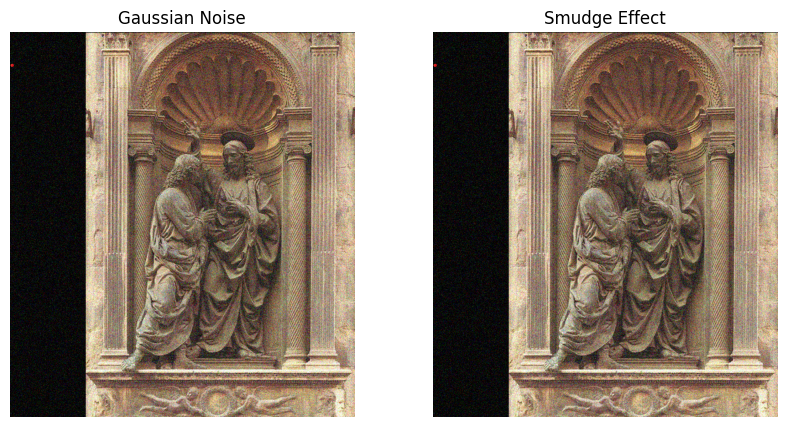

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt





# Test the updated functions
image_path = 'ancient_statue.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Apply Gaussian noise
    noisy_image = add_gaussian_noise(image)

    # Apply Smudge effect
    smudged_image = apply_smudge_effect(noisy_image)

    # Display the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gaussian Noise')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(smudged_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Smudge Effect')

    plt.show()


In [ ]:
# Step 1: Install required libraries (if not already installed)
!pip install opencv-python-headless

import cv2
import numpy as np
import zipfile
import random
from PIL import Image
import io


# Define the augmentation function here (as in your initial code)
def augment_image(image):
    effects = [
        add_gaussian_noise,
        apply_smudge_effect,
        add_salt_and_pepper_noise,
        adjust_contrast,
        create_gradient_fade,
        random_fade,
        augment_image_multiple_times,
        create_water_stain_mask,
        add_scratches,
        add_mold_stains,
        add_burn_marks,
        apply_sepia,
        add_torn_edges,
        add_dust_and_scratches
    ]

    num_effects = random.randint(1, 3)
    selected_effects = random.sample(effects, num_effects)

    augmented_image = image.copy()
    for effect in selected_effects:
        if effect == create_water_stain_mask:
            mask = create_water_stain_mask(augmented_image.shape)
            augmented_image = apply_water_stain(augmented_image, mask)
        elif effect == augment_image_multiple_times:
            num_removals = random.randint(1, 10)
            augmented_image = augment_image_multiple_times(augmented_image, num_removals)
        else:
            augmented_image = effect(augmented_image)
    return augmented_image

# Function to read images from zip, augment, and save to a new zip
def process_images_in_zip(input_zip_path, output_zip_path):
    with zipfile.ZipFile(input_zip_path, 'r') as input_zip:
        with zipfile.ZipFile(output_zip_path, 'w') as output_zip:
            for file_name in input_zip.namelist():
                with input_zip.open(file_name) as file:
                    image = np.array(Image.open(file))
                    augmented_image = augment_image(image)
                    _, buffer = cv2.imencode('.png', augmented_image)
                    augmented_image_data = buffer.tobytes()
                    output_zip.writestr(file_name, augmented_image_data)

# Step 3: Set paths for input and output zip files in Google Drive
input_zip_path = '/content/drive/MyDrive/Dataset/Early_Renaissance.zip'  # Replace with your actual path
output_zip_path = '/content/drive/MyDrive/Dataset/augmented_images.zip'

# Step 4: Process images in zip and save to output path
process_images_in_zip(input_zip_path, output_zip_path)

print("Augmented images saved to:", output_zip_path)


KeyboardInterrupt: 

In [ ]:

# Step 2: Import required libraries
!pip install opencv-python-headless

import cv2
import numpy as np
import zipfile
import random
from PIL import Image

# Define your existing augment_image function here (without redefining individual effect functions)

# Define the augmentation function here (as in your initial code)
def augment_image(image):
    effects = [
        add_gaussian_noise,
        apply_smudge_effect,
        add_salt_and_pepper_noise,
        adjust_contrast,
        create_gradient_fade,
        random_fade,
        augment_image_multiple_times,
        create_water_stain_mask,
        add_scratches,
        add_mold_stains,
        add_burn_marks,
        apply_sepia,
        add_torn_edges,
        add_dust_and_scratches
    ]

    num_effects = random.randint(1, 3)
    selected_effects = random.sample(effects, num_effects)

    augmented_image = image.copy()
    for effect in selected_effects:
        if effect == create_water_stain_mask:
            mask = create_water_stain_mask(augmented_image.shape)
            augmented_image = apply_water_stain(augmented_image, mask)
        elif effect == augment_image_multiple_times:
            num_removals = random.randint(1, 10)
            augmented_image = augment_image_multiple_times(augmented_image, num_removals)
        else:
            augmented_image = effect(augmented_image)
    return augmented_image


# Function to read images from zip, augment, and save to a new zip
def process_images_in_zip(input_zip_path, output_zip_path):
    with zipfile.ZipFile(input_zip_path, 'r') as input_zip:
        with zipfile.ZipFile(output_zip_path, 'w') as output_zip:
            for file_name in input_zip.namelist():
                with input_zip.open(file_name) as file:
                    image = np.array(Image.open(file))
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

                    # Apply augmentation
                    augmented_image = augment_image(image)

                    # Convert back to BGR before saving
                    augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)

                    # Encode and write to zip
                    _, buffer = cv2.imencode('.png', augmented_image)
                    augmented_image_data = buffer.tobytes()
                    output_zip.writestr(file_name, augmented_image_data)

# Step 3: Set paths for input and output zip files in Google Drive
input_zip_path = '/content/drive/MyDrive/Dataset/Early_Renaissance.zip'  # Replace with your actual path
output_zip_path = '/content/drive/MyDrive/Dataset/augmented_images2.zip'

# Step 4: Process images in zip and save to output path
process_images_in_zip(input_zip_path, output_zip_path)

print("Augmented images saved to:", output_zip_path)


Augmented images saved to: /content/drive/MyDrive/Dataset/augmented_images2.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


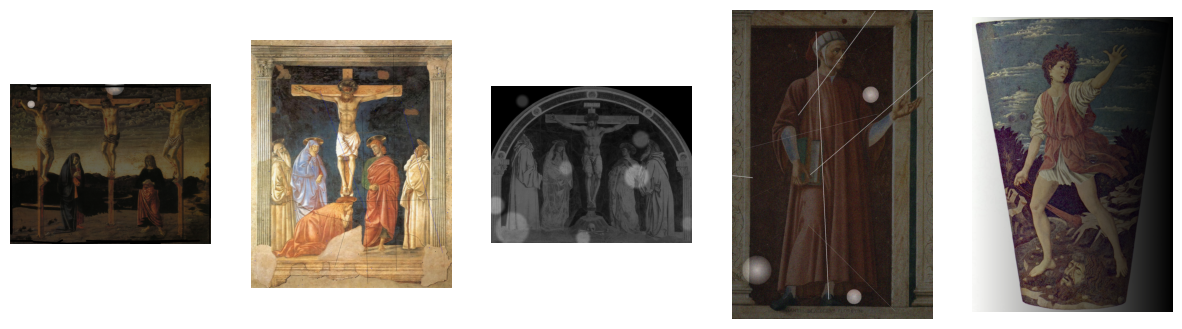

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Unzip the dataset
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Dataset/augmented_images2.zip'  # Path to your ZIP file
extract_folder = '/content/drive/MyDrive/Dataset/extracted_images/'  # Change to a dedicated folder in your Drive

# Create the directory if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extract to the specified folder

# Step 3: Load images from the extracted folder
input_folder = extract_folder  # Set to the folder where images are extracted
input_images = os.listdir(input_folder)[:5]  # Get only the first 5 images

# Step 4: Display the images
import cv2
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for ax, img_name in zip(axes, input_images):
    img_path = os.path.join(input_folder, img_name)
    image = cv2.imread(img_path)

    if image is not None:  # Ensure the image is loaded successfully
        ax.imshow(image)  # Directly display the image
    else:
        print(f"Error loading image: {img_path}")

    ax.axis('off')  # Hide axis

plt.show()  # Display the images


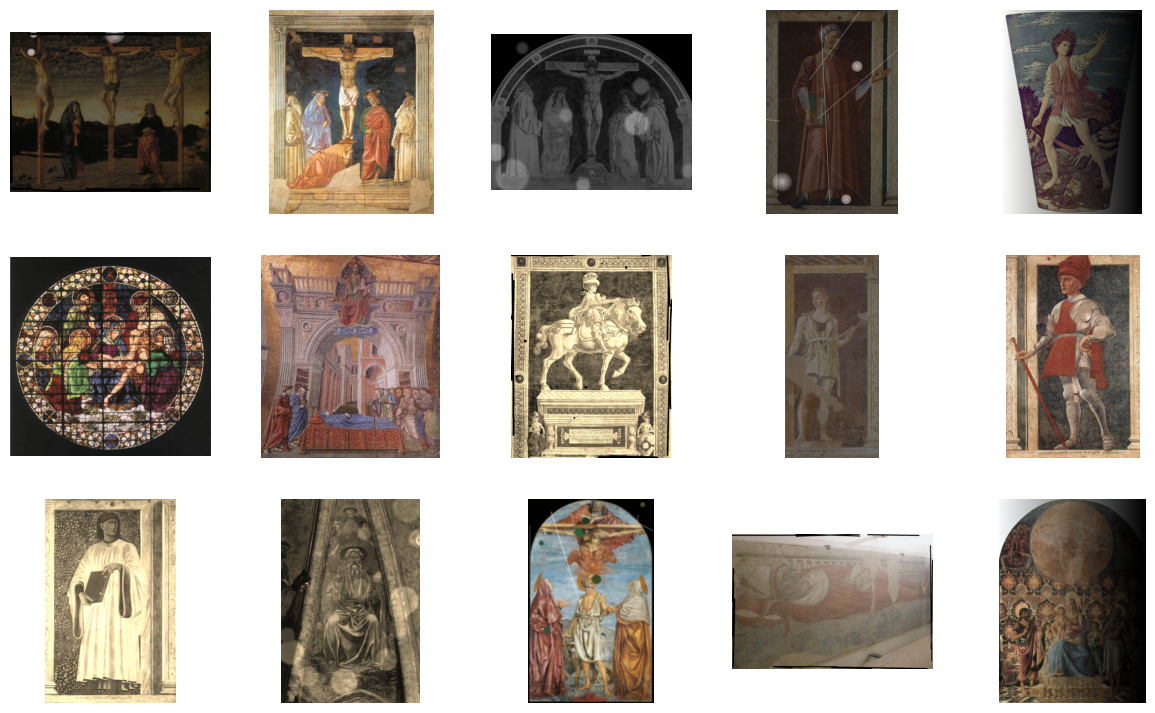

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Assuming 'extract_folder' is already defined and contains your images
input_folder = extract_folder  # Set to the folder where images are extracted
input_images = os.listdir(input_folder)[:15]  # Get only the first 15 images

# Calculate the number of rows needed for the number of images (5 images per row)
num_images = len(input_images)
num_cols = 5
num_rows = (num_images + num_cols - 1) // num_cols  # Ceiling division to get the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust the figure size

# Flatten the axes array if there are multiple rows
axes = axes.flatten() if num_rows > 1 else [axes]

for ax, img_name in zip(axes, input_images):
    img_path = os.path.join(input_folder, img_name)
    image = cv2.imread(img_path)

    if image is not None:  # Ensure the image is loaded successfully
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        ax.imshow(image)  # Directly display the image
        ax.axis('off')  # Hide axis
    else:
        ax.axis('off')  # Hide axis for missing images
        print(f"Error loading image: {img_path}")

# Hide any unused subplots
for i in range(len(input_images), len(axes)):
    axes[i].axis('off')  # Hide unused axes

plt.show()  # Display the images


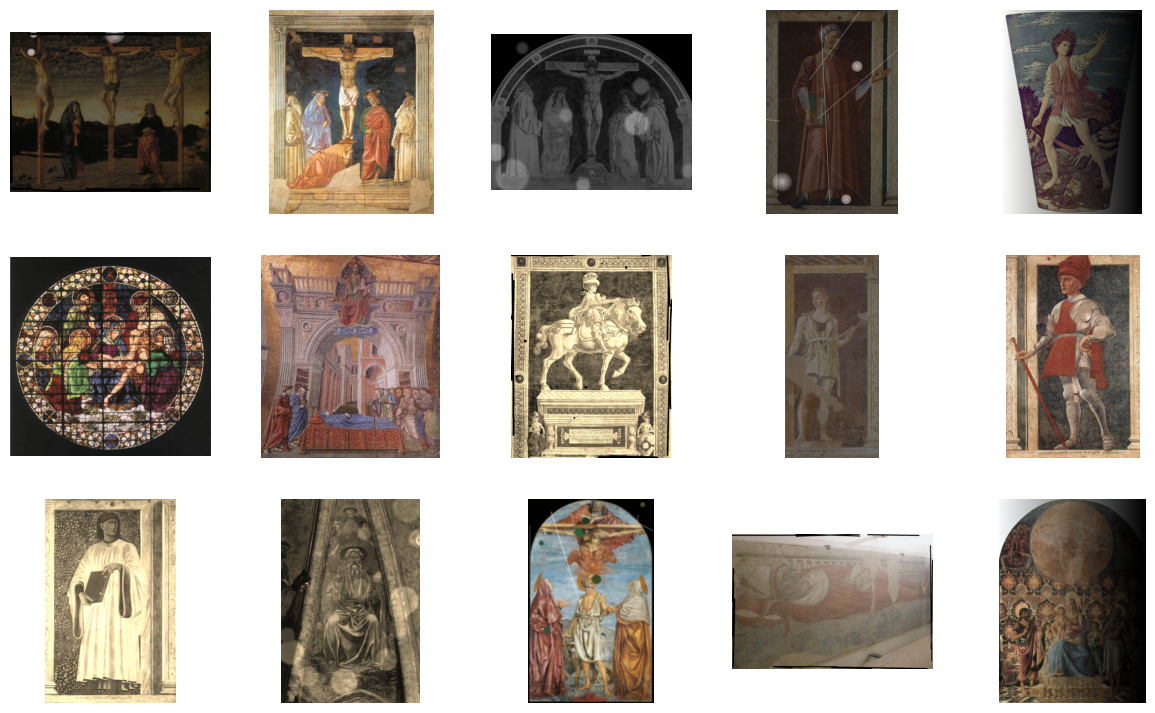

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Assuming the images are already extracted and stored in input_folder
input_folder = extract_folder  # Set to the folder where images are extracted
input_images = os.listdir(input_folder)[:15]  # Get only the first 15 images

# Calculate the number of rows needed for 15 images (5 images per row)
num_images = len(input_images)
num_cols = 5
num_rows = (num_images + num_cols - 1) // num_cols  # Ceiling division to get the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust the figure size

# Flatten the axes array if there are multiple rows
axes = axes.flatten() if num_rows > 1 else [axes]

for ax, img_name in zip(axes, input_images):
    img_path = os.path.join(input_folder, img_name)
    image = cv2.imread(img_path)

    if image is not None:  # Ensure the image is loaded successfully
        ax.imshow(image)  # Directly display the RGB image
        ax.axis('off')  # Hide axis
    else:
        ax.axis('off')  # Hide axis for missing images
        print(f"Error loading image: {img_path}")

# Hide any unused subplots
for i in range(len(input_images), len(axes)):
    axes[i].axis('off')  # Hide unused axes

plt.show()  # Display the images


In [ ]:
import cv2
import os

# Define the folder path containing images
input_folder = '/content/drive/MyDrive/Dataset/extracted_images'
output_folder = '/content/drive/MyDrive/Dataset/extracted_images_rgb'

# Create the output folder if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each file in the input folder
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)

    # Load the image using OpenCV
    image = cv2.imread(file_path)

    # Check if the file is a valid image
    if image is not None:
        # Convert the image from BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Save the converted image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

        print(f"Processed and saved: {output_path}")
    else:
        print(f"Failed to load: {file_path}")


Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_crucifixion-1.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_crucifixion-and-saints.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_crucifixion.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_dante-alighieri.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_david-with-the-head-of-goliath.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_deposition-of-christ.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_dormition-of-the-virgin.jpg
Processed and saved: /content/drive/MyDrive/Dataset/extracted_images_rgb/andrea-del-castagno_equestrian-monument-to-niccolo-da-tolentino-1456.jpg
Processed and saved: /content/driv

KeyboardInterrupt: 

In [ ]:
import zipfile
import cv2
import numpy as np

# Paths for input and output zip files
input_zip_path = '/content/drive/MyDrive/Dataset/augmented_images2.zip'
output_zip_path = '/content/drive/MyDrive/Dataset/extracted_images_rgb.zip'

# Open the input zip file and create the output zip file
with zipfile.ZipFile(input_zip_path, 'r') as input_zip, zipfile.ZipFile(output_zip_path, 'w') as output_zip:

    # Iterate over each file in the zip archive
    for file_name in input_zip.namelist():
        with input_zip.open(file_name) as file:
            # Read the image data directly from the zip file into memory
            image_data = np.frombuffer(file.read(), np.uint8)
            image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)  # Load image in BGR format

            if image is not None:
                # Convert from BGR to RGB
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Encode the RGB image back to bytes
                _, encoded_image = cv2.imencode('.jpg', image_rgb)  # Adjust extension if needed

                # Write the processed image directly into the output zip
                output_zip.writestr(file_name, encoded_image.tobytes())

                print(f"Processed and added to zip: {file_name}")
            else:
                print(f"Error loading image: {file_name}")


Processed and added to zip: andrea-del-castagno_crucifixion-1.jpg
Processed and added to zip: andrea-del-castagno_crucifixion-and-saints.jpg
Processed and added to zip: andrea-del-castagno_crucifixion.jpg
Processed and added to zip: andrea-del-castagno_dante-alighieri.jpg
Processed and added to zip: andrea-del-castagno_david-with-the-head-of-goliath.jpg
Processed and added to zip: andrea-del-castagno_deposition-of-christ.jpg
Processed and added to zip: andrea-del-castagno_dormition-of-the-virgin.jpg
Processed and added to zip: andrea-del-castagno_equestrian-monument-to-niccolo-da-tolentino-1456.jpg
Processed and added to zip: andrea-del-castagno_eve.jpg
Processed and added to zip: andrea-del-castagno_farinata-degli-uberti.jpg
Processed and added to zip: andrea-del-castagno_giovanni-boccaccio.jpg
Processed and added to zip: andrea-del-castagno_god-the-father-1442.jpg
Processed and added to zip: andrea-del-castagno_holy-trinity-with-st-jerome.jpg
Processed and added to zip: andrea-del-ca